# 🎓 Titanic Veri Seti Görselleştirme Uygulamaları
Her sorunun altında cevabınızı kodlayabilirsiniz.
Grafiklerinizi yorumlamanız ve grafikten çıkarımlarınızı yazmanız gerekmektedir.

## 🟢 Kolay Seviye

### ❓ Soru: Cinsiyete göre yolcu sayısını görselleştirin. (örn. countplot veya bar chart)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/tmp/ipython-input-4-4152876212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Blues')


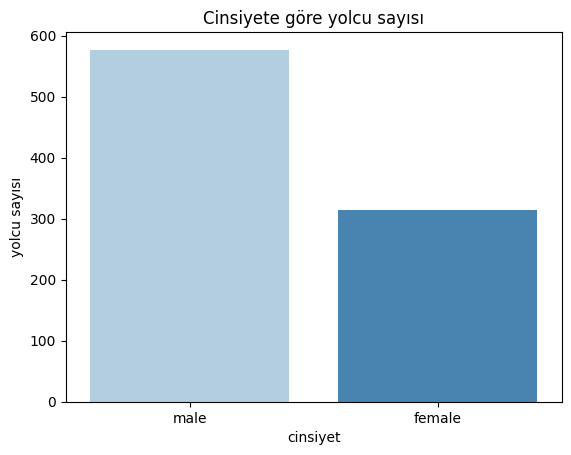

In [4]:
df['sex'].value_counts()

sns.countplot(x='sex', data=df, palette='Blues')
plt.title('Cinsiyete göre yolcu sayısı')
plt.xlabel('cinsiyet')
plt.ylabel('yolcu sayısı')
plt.show()
# seaborn ile çizimi, matplotlib ile başlık ekseni ayarlıyorum. seabornun daha modern, renkli olduğunu pekiştirdim.


### ❓ Soru: "Survived" değişkeninin dağılımını çiziniz.

In [5]:
df['survived'].value_counts() # grafiği çizmeden önce inceliyorum

,count
survived,
0,549
1,342


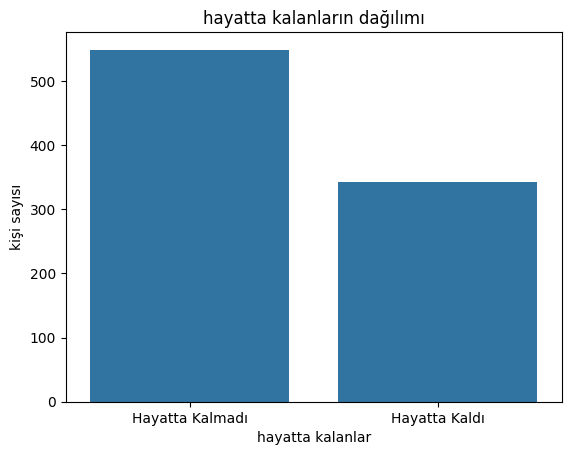

In [6]:
sns.countplot(x='survived', data=df)
plt.xlabel('hayatta kalanlar')
plt.ylabel('kişi sayısı')
plt.xticks([0, 1], ['Hayatta Kalmadı', 'Hayatta Kaldı']) # bu kısmı ai'dan öneri olarak aldım

plt.title('hayatta kalanların dağılımı')
plt.show()

### ❓ Soru: "Pclass" değişkeninin histogramını veya çubuk grafiğini oluşturun.

In [7]:
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


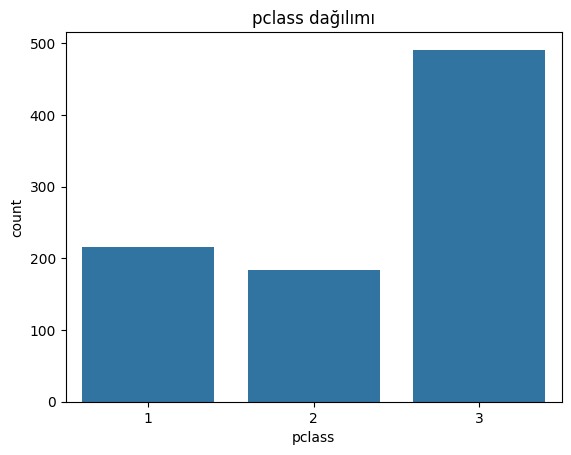

In [8]:
sns.countplot(x='pclass',data=df)  # histogram daha çok sayısal değerler için kullanılıyor sanırım o yüzden çubuk kullandım
plt.xlabel('pclass')
plt.title('pclass dağılımı')
plt.show() # en kalabalık sınıfın 3. sınıf yani en düşük bütçeye sahip olan sınıf olduğu görülüyor

### ❓ Soru: "Age" değişkeninin histogramını çiziniz.

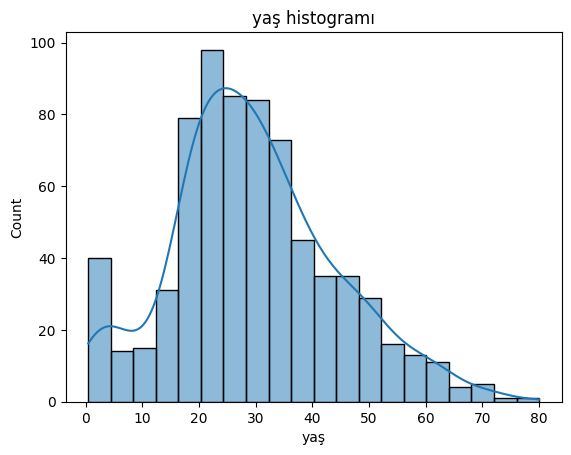

In [9]:
sns.histplot(x='age', data=df,kde= 'True') # ilk yazdığımda yanlışlıkla df'yi tırnak içinde yazıp hata aldım. bir de plt.hist ile de yapılabiliyor ben sns ile yapmak istedim.
# aralarındaki fark sns'de kde'yi (yoğunluk eğrisi) kendim true işaretledim, diğerinde manuel
plt.title('yaş histogramı')
plt.xlabel('yaş')

plt.show()

# grafiğe bakıldığında 20-25 yaş civarındaki insan sayısının en fazla olduğunu görüyoruz. ayrıca diğer çocuklara göre 0-5 yaş arası da daha fazla.

### ❓ Soru: "Fare" değişkeninin histogramını çizip açıklayınız.

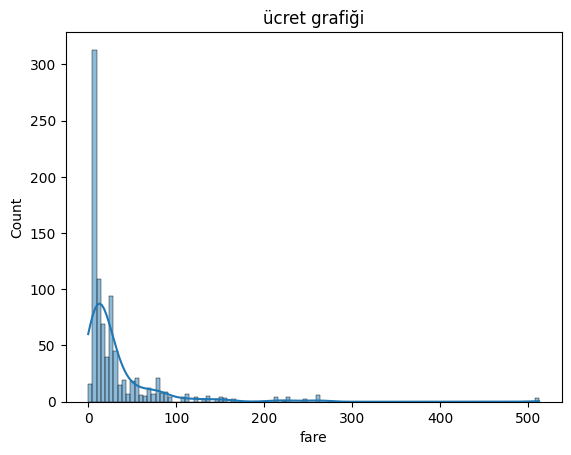

In [10]:
sns.histplot(x='fare', data= df, kde='True')
plt.title('ücret grafiği')
plt.show()

# grafiğe bakıldığında bazı grupların biletleri çok fahiş fiyatlardan aldığını görebiliyoruz. aykırı değerler içeriyor ancak çoğunlukla 0-100 birim civarında yoğunlaşmış.

## 🟡 Orta Seviye

### ❓ Soru: Cinsiyete göre yaş dağılımını karşılaştırın. (örn. boxplot, violinplot, kdeplot)

In [11]:
df.groupby('sex')['age'].value_counts()

sex     age 
female  24.0    16
        18.0    13
        22.0    12
        30.0    11
        35.0     8
                ..
male    57.0     1
        66.0     1
        70.5     1
        74.0     1
        80.0     1
Name: count, Length: 145, dtype: int64

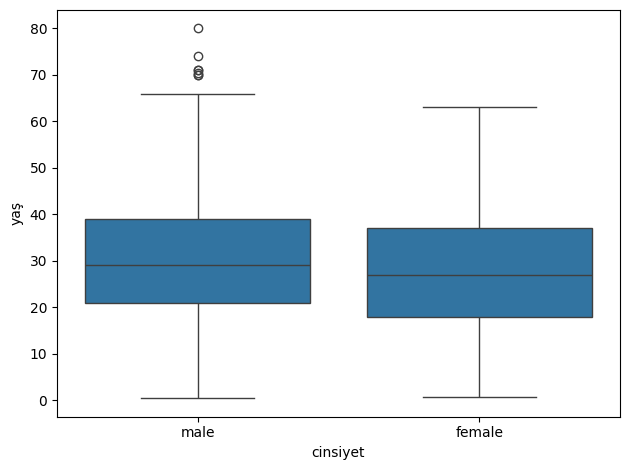

In [12]:
sns.boxplot(x='sex', y='age', data= df)
plt.xlabel("cinsiyet")
plt.ylabel("yaş")
plt.tight_layout()
plt.show()  # erkek grubunda daha fazla aykırı değer (yaşlı kişiler) daha fazla. bunun dışında iki cinsiyetin sınırları(çeyrekleri) arasında biraz fark olsa da medyanları birbirine yakın görünüyor.

### ❓ Soru: Pclass'a göre ücret dağılımını inceleyin.

In [13]:
df.groupby('pclass')['fare'].value_counts()

pclass  fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: count, Length: 255, dtype: int64

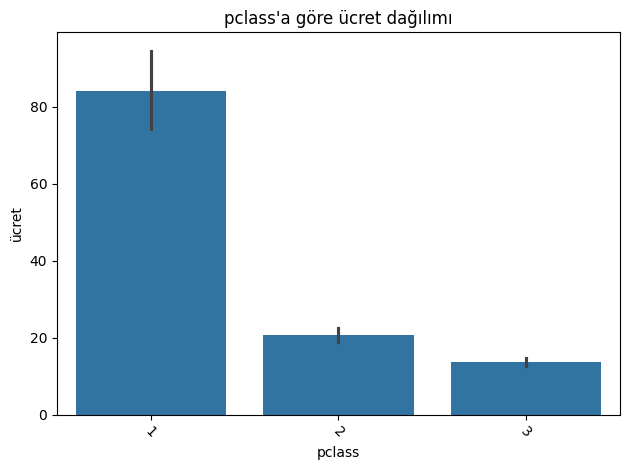

In [14]:
sns.barplot(x='pclass', y='fare', data=df)

plt.title("pclass'a göre ücret dağılımı")
plt.xlabel('pclass')
plt.ylabel('ücret')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

### ❓ Soru: Survived’a göre yaş dağılımını inceleyin.

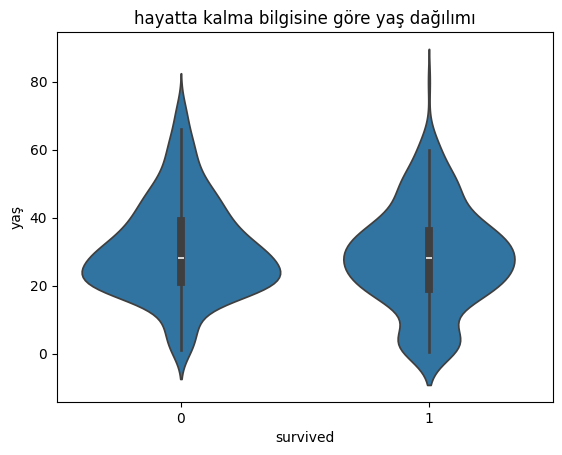

In [15]:
sns.violinplot(x='survived', y='age', data=df)
plt.title('hayatta kalma bilgisine göre yaş dağılımı')
plt.xlabel('survived')
plt.ylabel('yaş')
plt.show()

### ❓ Soru: Cinsiyet ve sınıfa göre hayatta kalma oranlarını barplot ile karşılaştırın.

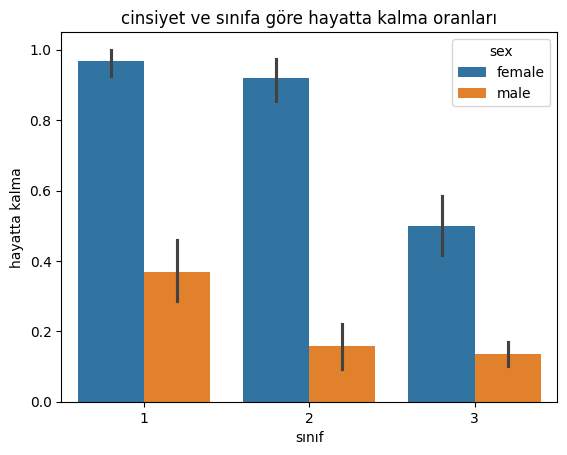

In [17]:
sns.barplot(x='pclass' , y='survived', hue='sex', data=df)
plt.title('cinsiyet ve sınıfa göre hayatta kalma oranları')
plt.xlabel('sınıf')
plt.ylabel('hayatta kalma')
plt.show()

#erkeklerin sınıf fark etmeksizin kadınlardan daha az hayatta kalma oranına sahip oldukları görülüyor


### ❓ Soru: FacetGrid ile cinsiyete göre yaş histogramlarını ayrı ayrı gösterin.

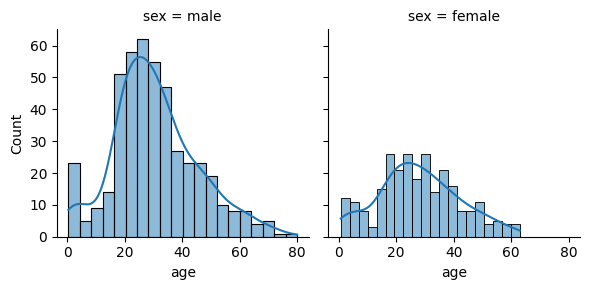

In [18]:
g = sns.FacetGrid(df, col="sex")
g.map(sns.histplot, "age", bins=20, kde=True)

plt.show()

### ❓ Soru: "Fare" ve "Age" değişkenleri arasında scatterplot oluşturun.

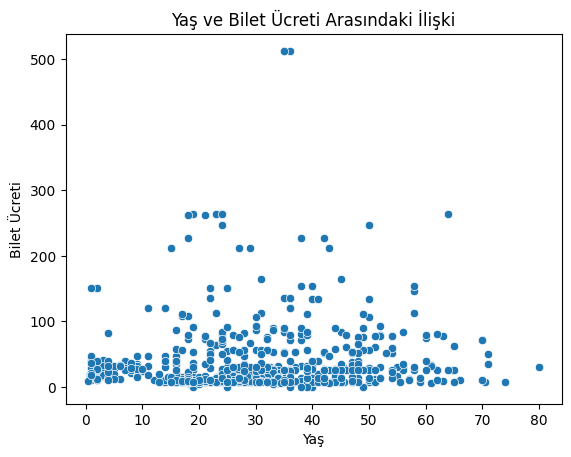

In [19]:
sns.scatterplot(x="age", y="fare", data=df)

plt.title("yaş ve bilet arasındaki ilişki")
plt.xlabel("yaş")
plt.ylabel("bilet ücreti")
plt.show()

### ❓ Soru: Korelasyon matrisi ve heatmap ile değişkenler arasındaki ilişkiyi görselleştirin.

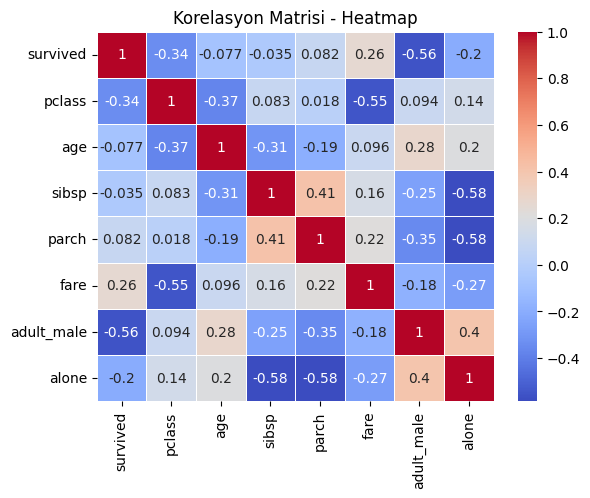

In [21]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Korelasyon Matrisi - Heatmap")
plt.show()

## 🔴 İleri Seviye

### ❓ Soru: "Age" değişkeninin çarpıklık (skewness) ve basıklığını (kurtosis) hesaplayın ve yorumlayın.

[np.str_('0.38910778230082704'), np.str_('0.17827415364210353')]


<Axes: xlabel='age', ylabel='Count'>

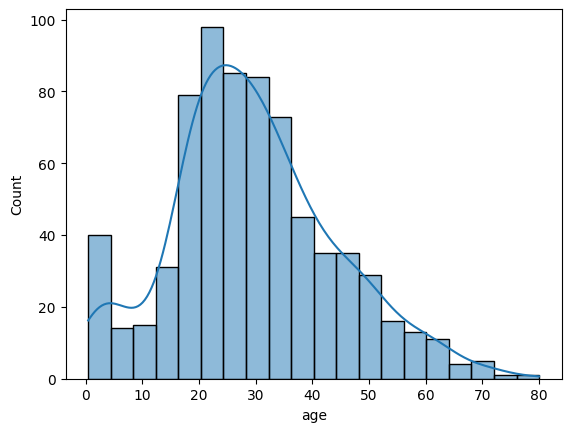

In [25]:
import scipy.stats as stats

skw = df['age'].skew().astype(str)
kurt = df['age'].kurt().astype(str)

print([skw,kurt])  # grafik sağa çarpık/ küçük yaş birey fazla, dağılım da basık yani uç değerler az (internetteki ölçeklerden yararlandım)

sns.histplot(df['age'], kde=True) # skw, kurt hesabından sonra görselleştirdim

### ❓ Soru: Seaborn pairplot ile sayısal değişkenleri inceleyin. Hayatta kalma durumunu hue parametresiyle ayırın.

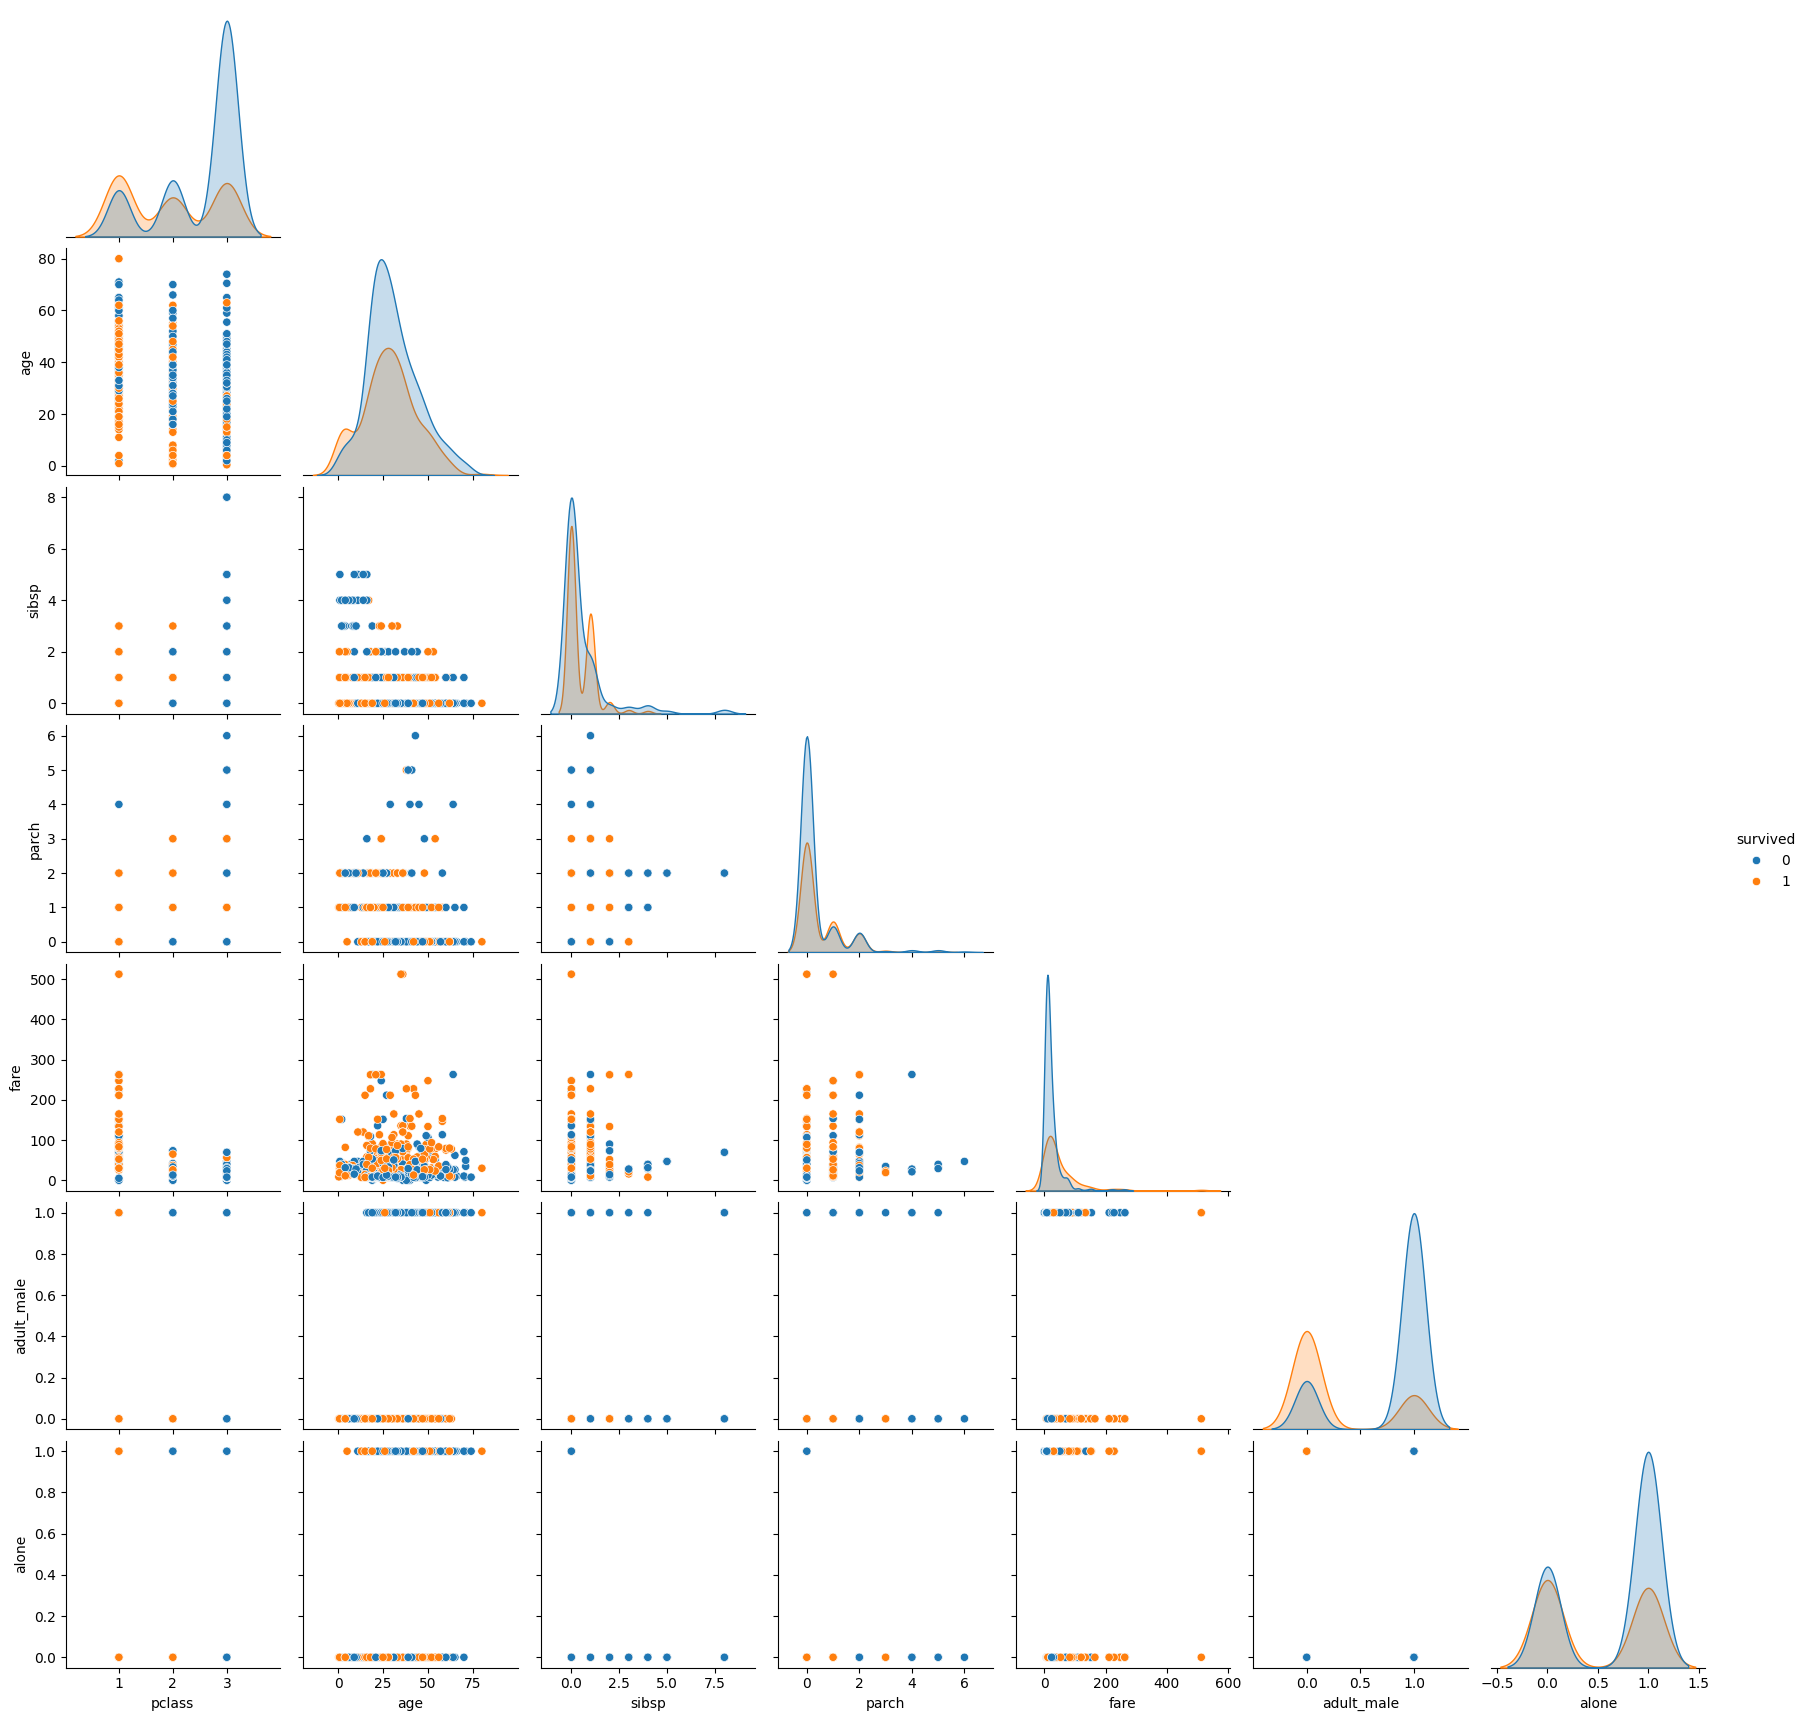

In [26]:
sns.pairplot(df, hue="survived", diag_kind="kde", corner=True)

plt.show()

### ❓ Soru: "Sex", "Pclass" ve "Survived" değişkenlerini içeren gruplu bir violinplot oluşturun.

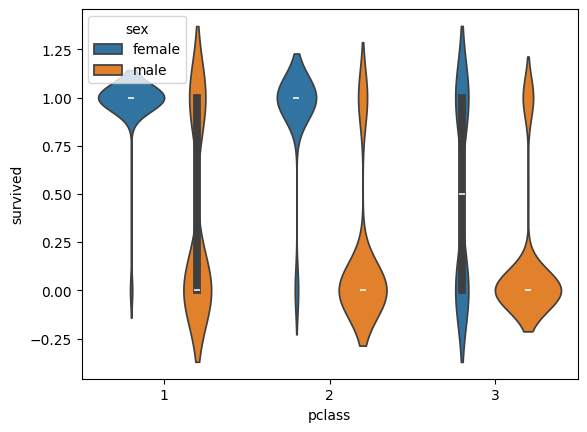

In [27]:
sns.violinplot(x='pclass',y='survived', hue='sex', data=df)
plt.xlabel('pclass')
plt.ylabel('survived')
plt.show()

### ❓ Soru: "Embarked" değişkenine göre fare dağılımını inceleyin.

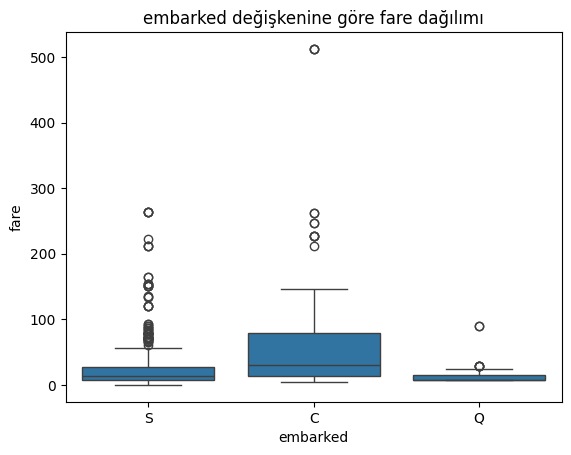

In [28]:
sns.boxplot(x='embarked',y='fare', data= df)
plt.title('embarked değişkenine göre fare dağılımı')
plt.xlabel('embarked')
plt.ylabel('fare')
plt.show() # C limanından binenlerin bilet ücretleri genel olarak daha yüksek, en yüksek fiyatlı bilet bu limandan alınmış, aralık daha geniş. diğer limanlarda fiyatlar daha ucuz ve aralık daha dar

### ❓ Soru: Plotly ile cinsiyet ve sınıfa göre interaktif bir histogram oluşturun.

In [29]:
import plotly.express as px
histogram = px.histogram(df, x="age", color="sex", facet_col="pclass")
histogram.show()

### ❓ Soru: Eksik veri analizi yaparak eksik verileri heatmap ile görselleştirin.

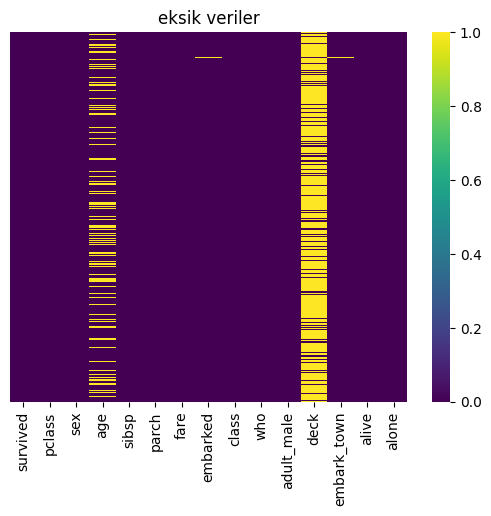

In [31]:
sns.heatmap(df.isnull(), cmap="viridis", yticklabels=False)
plt.title("eksik veriler")
plt.show()

### ❓ Soru: Cinsiyet ve yaş arasındaki ilişkiyi scatterplot ile gösterip renkleri hayatta kalma durumuna göre ayarlayın.

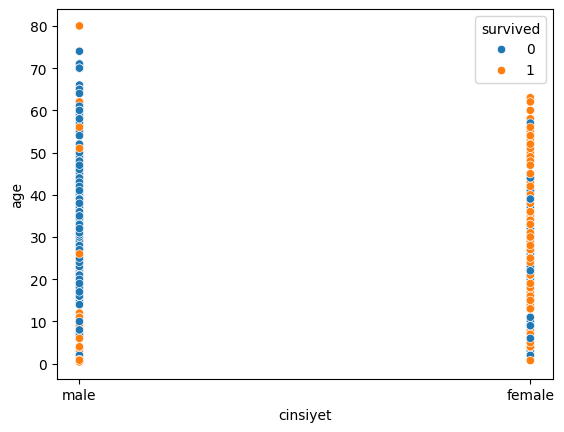

In [36]:
sns.scatterplot(x='sex', y='age', data=df, hue='survived')
plt.xlabel('cinsiyet')
plt.show()

### ❓ Soru: Matplotlib ile özelleştirilmiş bir bar grafiği oluşturun (renk, kalınlık, grid, label).

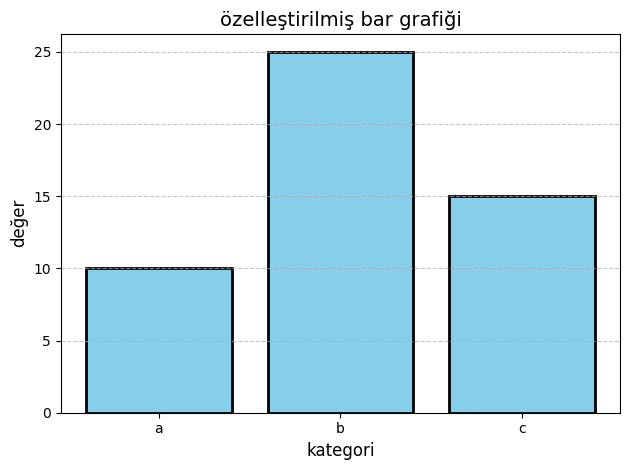

In [38]:
labels = ['a', 'b', 'c']
values = [10, 25, 15]

plt.bar(labels, values, color='skyblue', edgecolor='black', linewidth=2)

plt.title('özelleştirilmiş bar grafiği', fontsize=14)
plt.xlabel('kategori', fontsize=12)
plt.ylabel('değer', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 📘 Bonus Yorumlama Soruları

### ❓ Soru: Korelasyonu yüksek olan iki değişken bulun. İlişkilerini grafikle açıklayın.

In [43]:
korelasyon = df.corr(numeric_only=True)
print(korelasyon) # aynı anda yüksek sibsp ve yüksek parch değerine sahip olmak, bir yolcunun ailesiyle birlikte seyahat ettiğini gösterir.

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


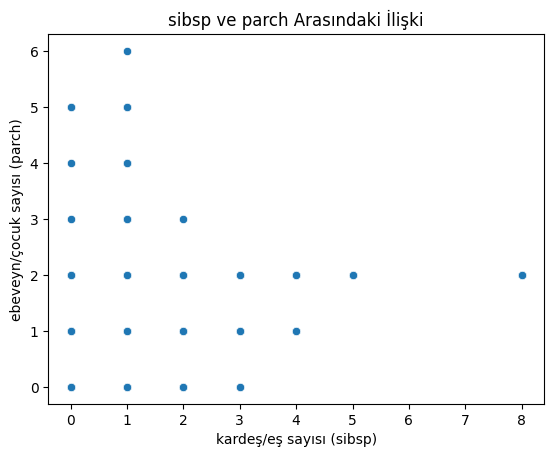

In [44]:
sns.scatterplot(x='sibsp', y='parch', data=df)
plt.title('sibsp ve parch Arasındaki İlişki')
plt.xlabel('kardeş/eş sayısı (sibsp)')
plt.ylabel('ebeveyn/çocuk sayısı (parch)')
plt.show()

### ❓ Soru: En fazla hayatta kalan grup hangisidir? (Cinsiyet + Sınıf)

In [39]:
# 1.sınıf kadınlardır

### ❓ Soru: Yaş dağılımı normal mi? Neden?

In [ ]:
# normal değil ama normale yakın sayılır. sağa çarpıklık ve hafif basıklık var. aykırı yaşlar sağda yoğun. büyük sapmalar olmadığı için normale yakın denebilir.

### ❓ Soru: Violinplot ile boxplot’ın farkı nedir?

Boxplot, verinin medyanını, çeyreklerini ve varsa aykırı değerlerini göstererek bize özet bir bakış sağlar. Ancak dağılımın nasıl bir şekle sahip olduğunu tam olarak göstermez. Violinplot ise hem bu istatistiksel özetleri içerir hem de verinin dağılımını yoğunluk eğrisiyle birlikte gösterdiği için daha detaylı bir analiz yapmamıza olanak tanır. Özellikle verinin simetrik olup olmadığını, yoğunluğun hangi aralıklarda toplandığını ya da çarpıklık gibi durumları violinplot sayesinde daha rahat görebiliriz.

### ❓ Soru: Grafiklerde dikkat edilmesi gereken 3 temel ipucu nedir?

In [ ]:
# 1 Doğru grafik türü seçilmeli
# 2 Ekseni ve etiketleri doğru belirtmek, seçmek
# 3 Grafiğin ilettiği mesaj net olmalı

## 🧠 Refleksiyon

**En çok şaşırdığınız veya dikkat çeken sonuç neydi? Görselleştirme size veriyle ilgili hangi içgörüleri sağladı?**

Beni en çok şaşırtan sonuç cinsiyete göre hayatta kalma durumu oldu. Erkeklerin sınıfa göre bile bu kadar az hayatta kalmış olması beni çok şaşırttı. Yolcuların çoğunluğu düşük-orta fiyatlarla bilet almış, genç yolcular diye anladım.